<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

In [1]:
import numpy as np      
import pandas as pd     

import matplotlib.pyplot as plt  

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [2]:
# YOUR CODE HERE
past = pd.read_csv('../dat/past.csv.gz')

In [3]:
# let's take a look at the data:
past.head(12)

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
0,5866936,5.618978e+08,1.333333,1.333333,5.550000e+03,15.84000,15.84000,0.000000,1.333333,0.000000,...,0.000000,0.000000,0.0,0.666667,0.333333,0.000000,0.000000,0,0.000000,1.000000
1,5647110,5.326529e+08,2.250000,1.500000,2.755650e+04,5.80000,5.56500,1.250000,0.250000,0.250000,...,0.250000,0.750000,0.0,0.000000,0.250000,0.000000,0.000000,0,0.000000,1.000000
2,5790472,4.578109e+08,1.000000,1.000000,0.000000e+00,6.27250,6.27250,0.250000,0.750000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.750000,0.250000,0.000000,0,0.000000,1.000000
3,5811598,4.612641e+08,1.500000,1.500000,1.315325e+05,5.56000,5.56000,0.250000,1.000000,0.250000,...,0.250000,0.000000,0.0,0.000000,0.500000,0.000000,0.250000,0,0.250000,1.000000
4,5846363,5.157993e+08,1.875000,1.375000,1.105588e+04,4.08625,4.08625,0.500000,1.000000,0.250000,...,0.250000,0.375000,0.0,0.125000,0.250000,0.250000,0.000000,1,0.000000,1.000000
5,5826406,5.040005e+08,4.000000,3.333333,1.016038e+06,5.56000,5.50000,0.333333,2.666667,0.666667,...,0.333333,0.333333,0.0,0.333333,0.333333,0.000000,0.000000,0,0.000000,0.666667
6,5550698,5.744890e+08,1.454545,1.090909,5.469909e+03,4.41000,4.41000,0.272727,0.909091,0.090909,...,0.272727,0.181818,0.0,0.181818,0.454545,0.090909,0.090909,1,0.000000,1.000000
7,5787920,4.994029e+08,1.000000,1.000000,0.000000e+00,4.76000,4.76000,0.500000,0.000000,0.500000,...,0.000000,0.000000,0.0,0.500000,0.500000,0.000000,0.000000,0,0.000000,1.000000
8,5824146,3.815759e+08,2.800000,1.600000,1.725962e+05,4.88800,4.77600,1.000000,0.800000,0.800000,...,0.000000,0.200000,0.0,0.400000,0.400000,0.000000,0.000000,1,0.000000,1.600000
9,5695916,5.929000e+08,1.000000,1.000000,0.000000e+00,1.43000,1.43000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.000000


In [4]:
past.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            5000 non-null   int64  
 1   user_id               5000 non-null   float64
 2   NumOfEventsInJourney  5000 non-null   float64
 3   NumSessions           5000 non-null   float64
 4   interactionTime       5000 non-null   float64
 5   maxPrice              5000 non-null   float64
 6   minPrice              5000 non-null   float64
 7   NumCart               5000 non-null   float64
 8   NumView               5000 non-null   float64
 9   NumRemove             5000 non-null   float64
 10  InsessionCart         5000 non-null   float64
 11  InsessionView         5000 non-null   float64
 12  InsessionRemove       5000 non-null   float64
 13  Weekend               5000 non-null   float64
 14  Fr                    5000 non-null   float64
 15  Mon                  

In [5]:
past.nunique()

product_id              5000
user_id                 4981
NumOfEventsInJourney     487
NumSessions              323
interactionTime         3429
maxPrice                2117
minPrice                2255
NumCart                  382
NumView                  405
NumRemove                349
InsessionCart           1542
InsessionView           1350
InsessionRemove         1515
Weekend                    1
Fr                       202
Mon                      200
Sat                      194
Sun                      208
Thu                      202
Tue                      208
Wed                      208
2019                     283
2020                     283
Jan                      241
Feb                      237
Oct                      241
Nov                      232
Dec                      215
Afternoon                223
Dawn                     161
EarlyMorning             222
Evening                  230
Morning                  215
Night                    172
Purchased?    

In [6]:
past.describe(include='all')

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.573727e+06,5.235286e+08,1.951080,1.327052,2.490234e+05,7.457600,7.426321,0.541953,0.893687,0.413592,...,0.169931,0.213311,0.065900,0.162676,0.244012,0.169207,0.085550,0.343800,0.059343,1.143728
std,1.161840e+06,5.998702e+07,1.324727,0.718266,6.920382e+05,11.883206,11.876266,0.565350,0.841036,0.772170,...,0.255599,0.275556,0.172911,0.246050,0.289270,0.252342,0.191101,0.475023,0.153912,0.438141
min,4.104000e+03,6.524181e+07,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.760491e+06,4.998498e+08,1.000000,1.000000,0.000000e+00,2.483750,2.480000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5.830816e+06,5.343735e+08,1.750000,1.166667,3.626375e+03,4.440585,4.440000,0.500000,1.000000,0.222222,...,0.000000,0.142857,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.875312e+06,5.616843e+08,2.308355,1.500000,2.071993e+05,7.620000,7.550000,0.858766,1.000000,0.632775,...,0.250000,0.333333,0.040000,0.250000,0.363636,0.250000,0.090909,1.000000,0.041888,1.045996
max,5.932538e+06,6.220262e+08,40.000000,28.000000,1.087537e+07,236.510000,236.510000,12.000000,28.000000,38.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

In [7]:
# YOUR CODE HERE
past['Purchased?'].mean()

0.3438

### _Answer:_  
*  _What percentage of the interactions (rows) resulted in a purchase?_  
___Ans:___ About 34.4% of interactions (rows) resulted in a Purchase.  


*  _Do people mostly buy what they look at or do they do a lot of "window  
shopping" (shopping around without buying)?_  
___Ans:___ Roughly speaking, ~⅔ interactions don't result in a purchase and  
can be thought of as an estimate of "window shopping." Formally speaking,  
however, since we're not taking into account the specific events of an interaction's  
"journey," it is likely that the total number of product views in the above  
dataframe of 5,000 interactions (whether resulting in a purchase or not) is  
_greater than_ 5,000 ⇒ our estimate of ~⅔ interactions representing  
"windows shopping" is a _lower bound estimate_ if we define:  
    `window shopping = Σ (# product purchases) / Σ (# product views)`

  
*  _From the perspective of classification, is the data balanced?_  
___Ans:___ The above data indicate that for the the binary outcome  
not-purchased vs. purchased, the ratio of not-purchased to purchased  
for the given interactions is about 2:1 (⅔ : ⅓), which is not  
grossly imbalanced.

3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [8]:
X = past.drop(columns=['user_id', 'product_id'])
y = X.pop('Purchased?')

In [9]:
X.head(12)

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,InsessionCart,InsessionView,...,Nov,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon,Category
0,1.333333,1.333333,5.550000e+03,15.84000,15.84000,0.000000,1.333333,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.666667,0.333333,0.000000,0.000000,0.000000,1.000000
1,2.250000,1.500000,2.755650e+04,5.80000,5.56500,1.250000,0.250000,0.250000,3.750000,2.250000,...,0.250000,0.250000,0.750000,0.0,0.000000,0.250000,0.000000,0.000000,0.000000,1.000000
2,1.000000,1.000000,0.000000e+00,6.27250,6.27250,0.250000,0.750000,0.000000,17.250000,30.000000,...,0.250000,0.000000,0.000000,0.0,0.000000,0.750000,0.250000,0.000000,0.000000,1.000000
3,1.500000,1.500000,1.315325e+05,5.56000,5.56000,0.250000,1.000000,0.250000,3.250000,10.500000,...,0.250000,0.250000,0.000000,0.0,0.000000,0.500000,0.000000,0.250000,0.250000,1.000000
4,1.875000,1.375000,1.105588e+04,4.08625,4.08625,0.500000,1.000000,0.250000,4.875000,3.375000,...,0.250000,0.250000,0.375000,0.0,0.125000,0.250000,0.250000,0.000000,0.000000,1.000000
5,4.000000,3.333333,1.016038e+06,5.56000,5.50000,0.333333,2.666667,0.666667,8.000000,4.000000,...,0.000000,0.333333,0.333333,0.0,0.333333,0.333333,0.000000,0.000000,0.000000,0.666667
6,1.454545,1.090909,5.469909e+03,4.41000,4.41000,0.272727,0.909091,0.090909,4.818182,3.636364,...,0.000000,0.272727,0.181818,0.0,0.181818,0.454545,0.090909,0.090909,0.000000,1.000000
7,1.000000,1.000000,0.000000e+00,4.76000,4.76000,0.500000,0.000000,0.500000,14.000000,45.500000,...,1.000000,0.000000,0.000000,0.0,0.500000,0.500000,0.000000,0.000000,0.000000,1.000000
8,2.800000,1.600000,1.725962e+05,4.88800,4.77600,1.000000,0.800000,0.800000,10.800000,20.600000,...,0.600000,0.000000,0.200000,0.0,0.400000,0.400000,0.000000,0.000000,0.000000,1.600000
9,1.000000,1.000000,0.000000e+00,1.43000,1.43000,0.000000,1.000000,0.000000,10.000000,7.000000,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [10]:
y.head(12)

0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     0
8     1
9     0
10    0
11    0
Name: Purchased?, dtype: int64

In [11]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

### _Answer:_  
As Sebastian Raschka points out, while mean-centering does not affect the  
covariance matrix, both feature scaling and standardization (μ = 0, σ = 1) ___do___.

In [12]:
X_scaled = StandardScaler().fit_transform(X)

In [13]:
# take a look at X_scaled:
print(X_scaled.shape)

(5000, 34)


In [14]:
pca = PCA(n_components=5, random_state=0, whiten=True)
X_reduced = pca.fit_transform(X_scaled)

In [15]:
assert X_reduced.shape == (5000, 5)

In [16]:
# take a look at X_reduced:
print(X_reduced)

[[ 0.30573678 -0.9487725   0.7263802  -0.0056057   0.46399657]
 [ 0.24375752  0.0110209  -0.41861686  0.14278212  0.61985593]
 [-0.08544161 -0.65292073 -0.32903781 -0.33871745 -1.3222435 ]
 ...
 [ 1.15088908 -1.33359355 -0.68035111 -0.3685016   1.14465992]
 [ 1.34004268 -1.10104437 -0.69679521  0.23360385  1.80388222]
 [-1.32200205  0.19572472 -0.0068598  -0.48549957 -0.16829627]]


5. Print out the percentage of variance explained by each of the selected components.

In [17]:
# use explained_variance_ratio_ attribute:
exp_var_pca = pca.explained_variance_ratio_
print(exp_var_pca)

[0.10282299 0.09445816 0.06513061 0.05112375 0.04251041]


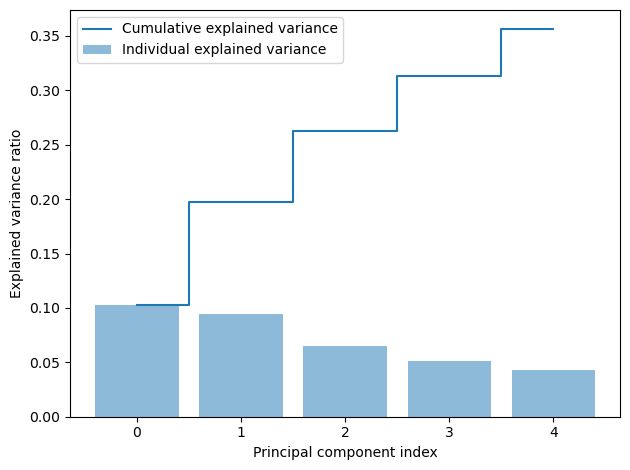

In [18]:
# calculate cumulative sum of eigenvalues:
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [19]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [20]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

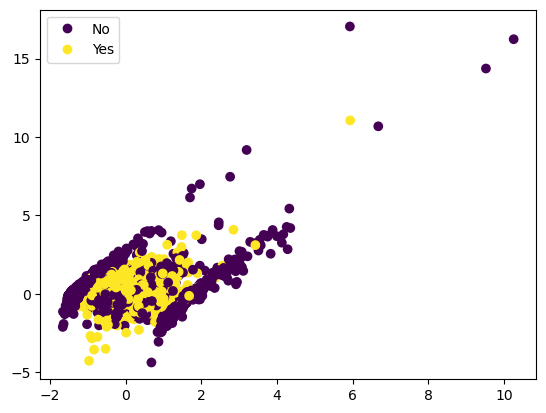

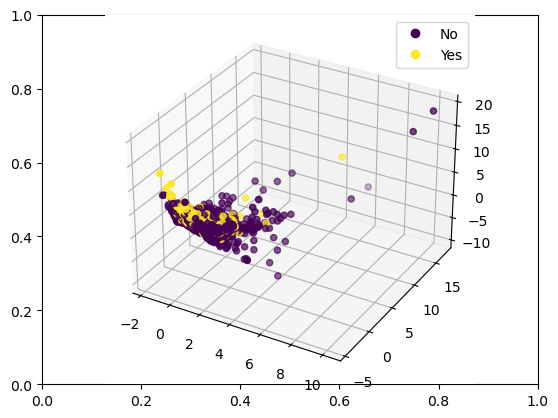

In [21]:
# YOUR CODE HERE
visualize_2pcs(X_reduced, y)
visualize_3pcs(X_reduced, y)

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [22]:
# YOUR CODE HERE (imports!)

def train(X, y, standardize = True) -> None:
    # YOUR CODE HERE
    # train_test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
    
    # apply logistic regression:
    if standardize:
        pipe = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced'))
    else:
        pipe = make_pipeline(LogisticRegression(class_weight='balanced'))
        
    # fit pipeline using training data:
    pipe.fit(X_train, y_train)
    
    # make predictions:
    y_pred = pipe.predict(X_test)
    
    # print classification report on test data:
    target_names = ['no purchase', 'purchase']
    
    return print(classification_report(y_test, y_pred, target_names=target_names))    

Now apply the pipeline on the all the features `X` and review the performance

In [23]:
# let's apply pipeline on all features in X without standardization first:
train(X, y, standardize=False)

              precision    recall  f1-score   support

 no purchase       0.98      0.40      0.57       649
    purchase       0.47      0.99      0.64       351

    accuracy                           0.61      1000
   macro avg       0.73      0.70      0.61      1000
weighted avg       0.81      0.61      0.60      1000



In [24]:
# now apply pipeline on all features in X with standardization:
train(X, y, standardize=True)

              precision    recall  f1-score   support

 no purchase       0.75      0.77      0.76       649
    purchase       0.55      0.52      0.54       351

    accuracy                           0.68      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.68      0.68      0.68      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

In [25]:
# when applying pipeline to X_reduced, don't need to standardize since
# we've already done that:
#     previously, X_reduced = pca.fit_transform(X_scaled), where
#     X_scaled = StandardScaler().fit_transform(X)
train(X_reduced, y, standardize=False)

              precision    recall  f1-score   support

 no purchase       0.74      0.70      0.72       649
    purchase       0.49      0.54      0.51       351

    accuracy                           0.64      1000
   macro avg       0.61      0.62      0.62      1000
weighted avg       0.65      0.64      0.65      1000



In [26]:
# let's compared with (re)-standardization anyway
train(X_reduced, y, standardize=True)

              precision    recall  f1-score   support

 no purchase       0.74      0.70      0.72       649
    purchase       0.49      0.54      0.51       351

    accuracy                           0.64      1000
   macro avg       0.61      0.62      0.62      1000
weighted avg       0.65      0.64      0.65      1000



##### _OK that makes sense..._
_(standardizing X_reduced makes no difference since it's already been  
standardized)_

8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    *YOUR ANSWER HERE*

### _Answer:_  
Comparing the cells above, we see that almost the performance metrics applying  
logistic regression to the full dataset **X** (all features retained & standardized)  
are _only slightly better_ than those obtained by applying logistic regression to  
**X_reduced** (dimensionality reduced from 34 to 5 via PCA). Thus, using PCA, we have  
achieved nearly identical model performance while presumably reducing computational  
complexity (and generally speaking, overfitting). Still, these results are somewhat    
surprising since the applied PCA (dim 34 → 5) cumulatively explains _only about 35% of the  
data's variance_; yet despite significant information loss, it loses little in predictive  
performance. _(Perhaps a lot of the 'information' lost via PCA in this case actually  
represents 'noise' rather than anything substantively informative to the task of  
predicting purchases.)_

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on X, ~~the reduced data,~~~ experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [28]:
# (already imported above)

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [31]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1000, random_state=10).fit(X)
        inertias.append(kmeans.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

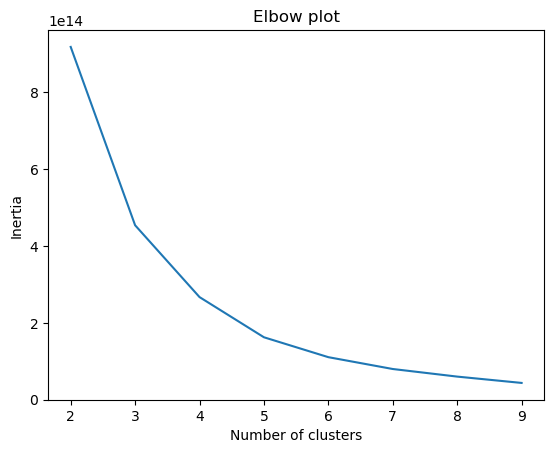

In [32]:
# define no. of centroids to test = 'ks':
ks = list(range(2,10))
visualize_elbow(X, ks)

4. What are the disadvantage to use the Elbow method? 

### _Answer:_  
The primary disadvantage of the Elbow method is that often, it is _not  
clear where the Elbow is (on the Elbow plot)!_ Deciding which k value gives  
sufficiently low inertia, such that the _even lower inertia_ associated with  
k+1 clusters represents _a diminishing return relative to model complexity  
(and/or reality),_ is indeed an inexact enterprise at best.

Obviously, when k = n, where n = # input samples, the distortion cost  
function = 0, but this model hasn't meaningfully clustered anything.    
Similarly, at the other extreme, when k = 1, the distortion  
cost function will be maximal, but also with nothing meaningfully clustered.  
The Elbow method represents a _subjective 'best guess'_ between these  
two extremes.

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [34]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.8993912307892715
For n_clusters = 3 The average silhouette_score is : 0.8325567959468976
For n_clusters = 4 The average silhouette_score is : 0.7978269344901815
For n_clusters = 5 The average silhouette_score is : 0.7949253715938491
For n_clusters = 6 The average silhouette_score is : 0.7888706781669649
For n_clusters = 7 The average silhouette_score is : 0.778257882142008
For n_clusters = 8 The average silhouette_score is : 0.7789559543996923


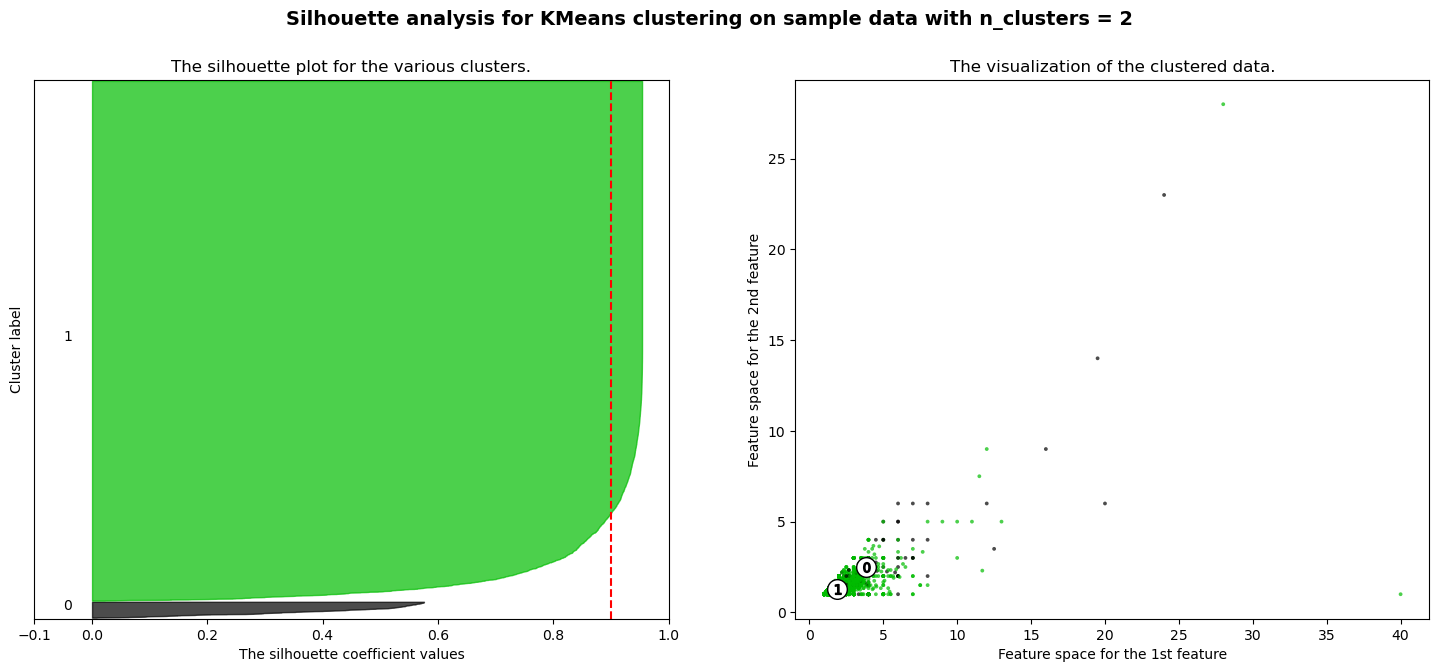

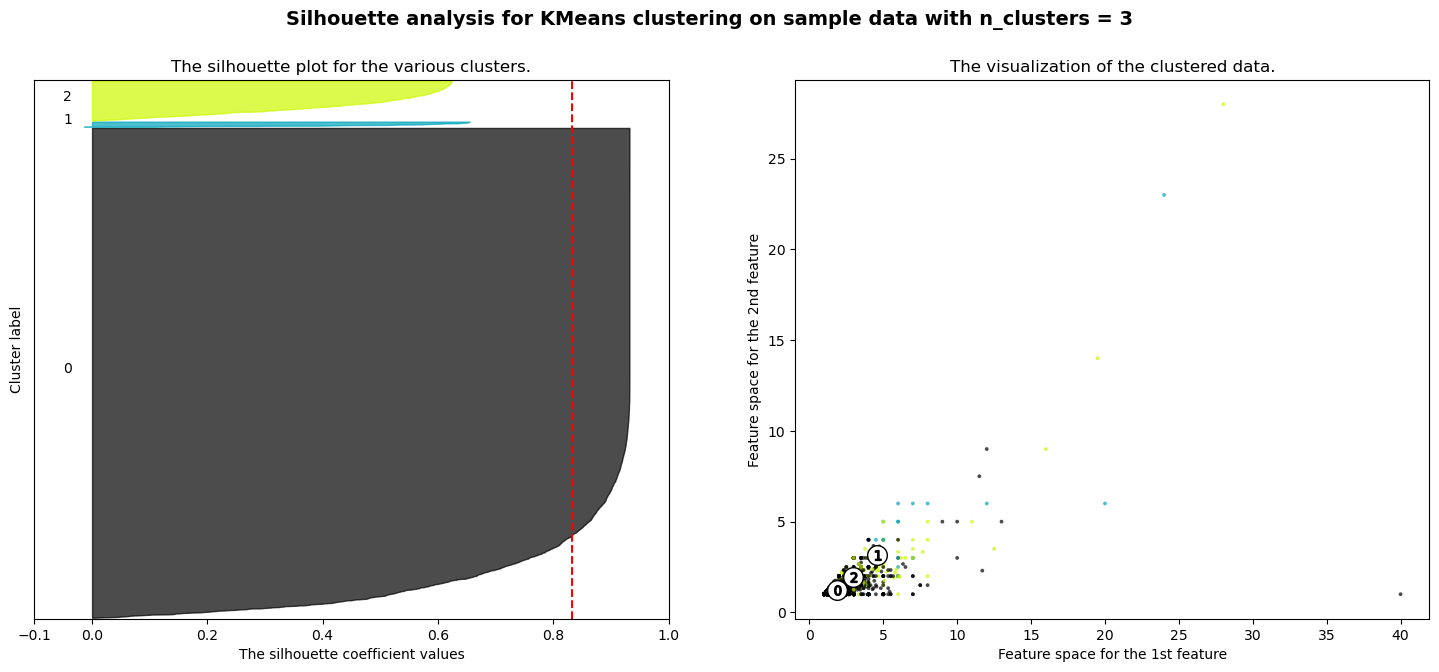

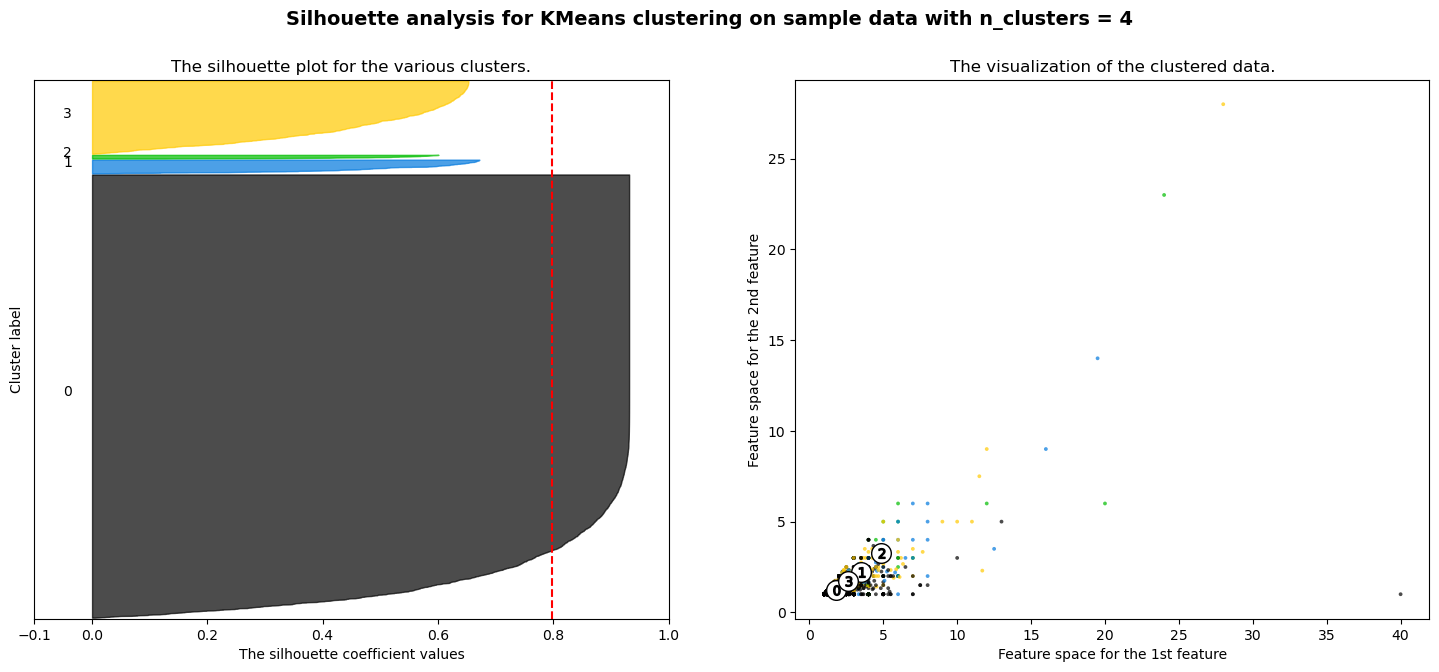

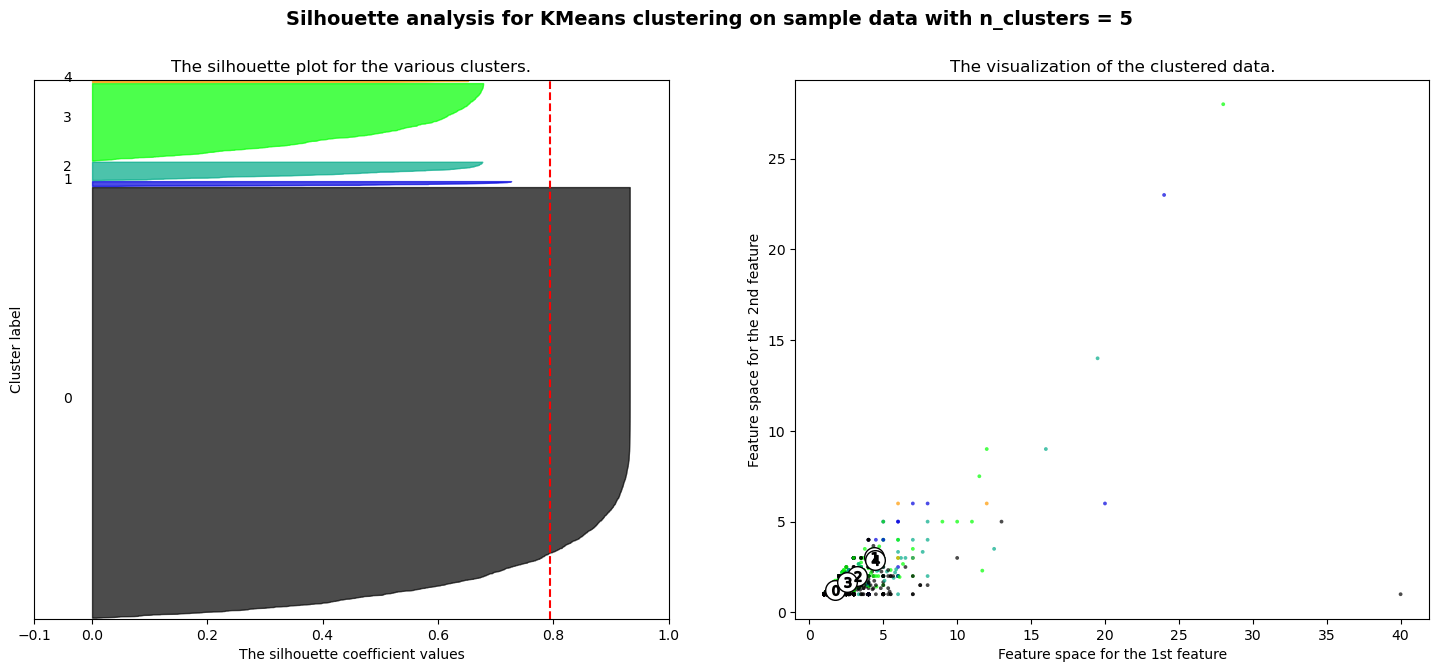

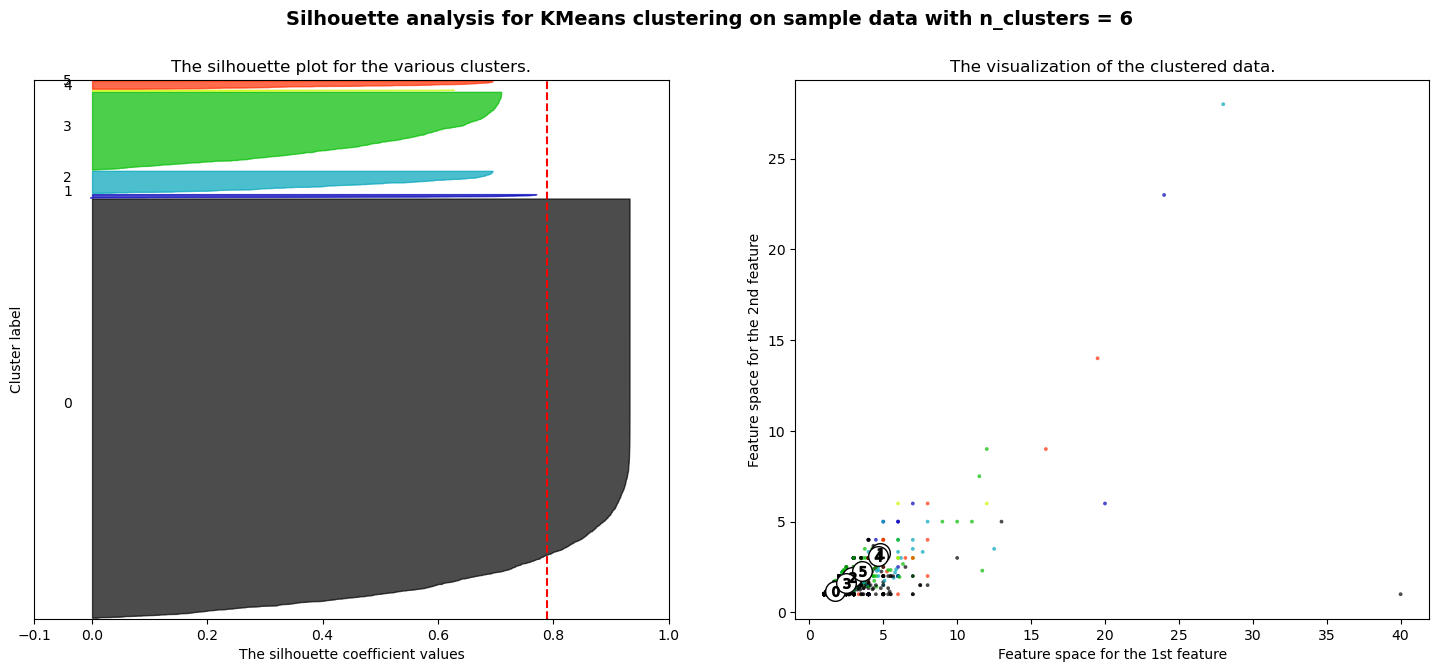

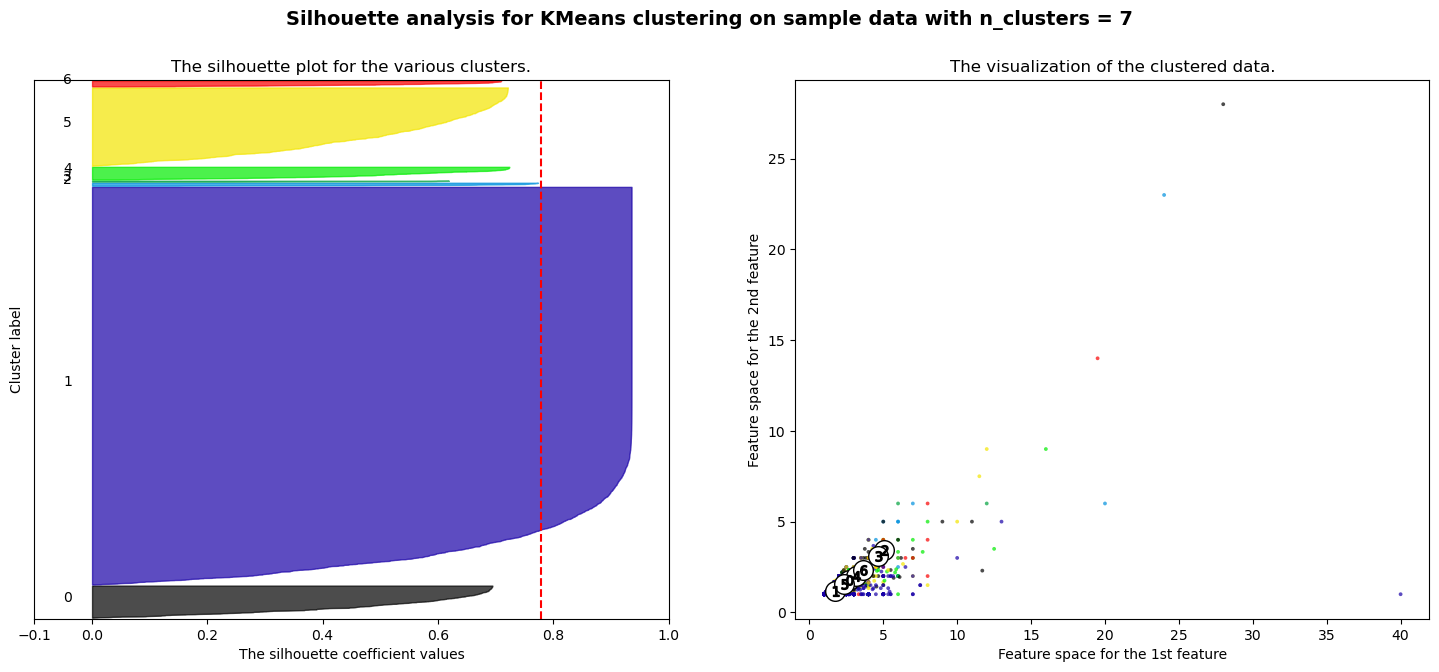

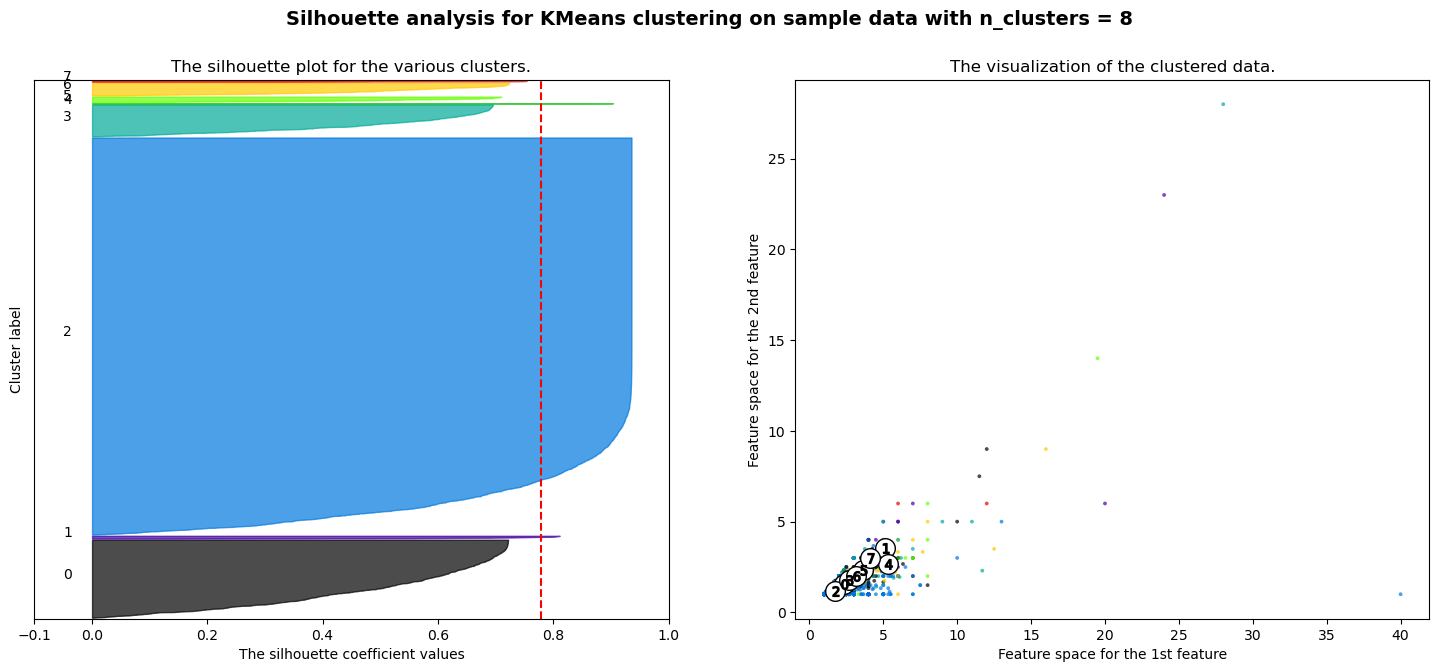

In [37]:
# convert X dataframe to numpy ndarray:
X_arr = X.to_numpy()

visualize_silhouette(8, X_arr, 10)    # (parameters are max_clusters:int,
                                      #  X:np.ndarray,
                                      #  random_state:int=10)

6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [ ]:
# YOUR CODE HERE

7. What is the size of each cluster? 

In [ ]:
# YOUR CODE HERE

8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [ ]:
# YOUR CODE HERE

9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

    *YOUR ANSWER HERE*

In [ ]:
# YOUR CODE HERE

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

    *YOUR ANSWER HERE*

In [ ]:
# YOUR CODE HERE

11. Jot down recommendations or followup steps, detailing the reasons.

    *YOUR ANSWER HERE*

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [ ]:
# YOUR CODE HERE

In [ ]:
assert new.shape == (30091, 5)

In [ ]:
new.head()

2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

        *YOUR ANSWER HERE*

    *The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.*

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [ ]:
# YOUR CODE HERE

4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [ ]:
# YOUR CODE HERE # ~.344

5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [ ]:
# YOUR CODE HERE

In [ ]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [ ]:
# YOUR CODE HERE

7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [ ]:
# YOUR CODE HERE

In [ ]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [ ]:
# YOUR CODE HERE

In [ ]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [ ]:
# YOUR CODE HERE

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [ ]:
semi_sup_preds = # YOUR CODE HERE

In [ ]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [ ]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [ ]:
print(classification_report(y_test, y_pred))

    *YOUR ANSWER HERE*

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)